# Creating combined AGAGE files

Before you run this tutorial, make sure you've run the setup script to create your config file.

In [1]:
from agage_archive.io import read_agage, read_ale_gage, output_dataset, combine_datasets
from agage_archive.processing import format_dataset


To read AGAGE netCDF files, use the read_agage function. E.g.:

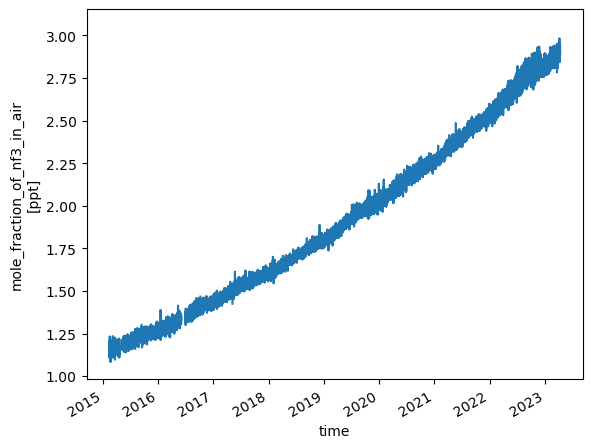

In [10]:
ds_agage = read_agage("NF3", "CGO", "GCMS-Medusa")
ds_agage.mf.plot()

In [11]:
ds_agage

<xarray.Dataset>
Dimensions:           (time: 65411)
Coordinates:
  * time              (time) datetime64[ns] 2004-01-21T00:38:00 ... 2023-04-1...
Data variables:
    inlet_height      (time) int32 10 10 10 10 10 10 10 ... 70 70 70 70 70 70 70
    mf                (time) float32 nan nan nan nan ... 2.883 2.899 2.887 2.899
    mf_repeatability  (time) float32 nan nan nan nan ... 0.01291 0.01286 0.01383
    sampling_time     (time) float64 1.2e+03 1.2e+03 1.2e+03 ... 1.2e+03 1.2e+03
Attributes: (12/19)
    comment:                    AGAGE GCMS-Medusa measurements. Output from G...
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.000000
    inlet_latitude:             -40.683000
    ...                         ...
    instrument_comment_1:       original MSD detector
    data_dir:                   /agage/capegrim-medusa
    species:                    nf3
    calibration_scale:          SIO-12
    units:                      ppt
    file_created:               2023-04-11 09:01:18

Similarly, ALE or GAGE data can be read using:

In [12]:
ds_gage = read_ale_gage("CH3CCl3", "CGO", "GAGE")

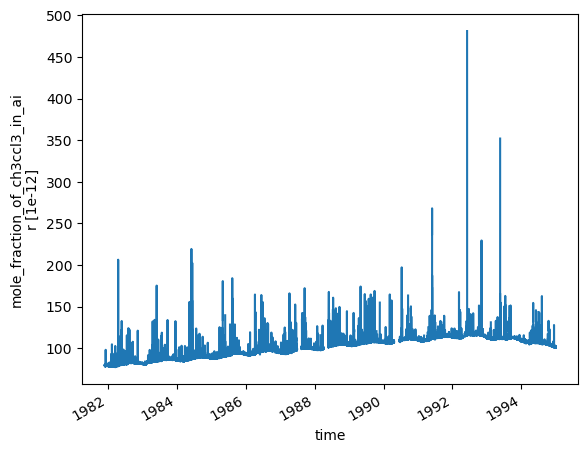

In [13]:
ds_gage.mf.plot()

The ```combine_datasets``` function calls these functions, based on the order in which they are specified in ```data/data_selector.json```.

Here, we will create a CH3CCl3 timeseries from CGO ALE, GAGE, GCMD and Medusa data:

In [15]:
ds = combine_datasets("CH3CCl3", "CGO", scale="SIO-05")

In [16]:
ds

<xarray.Dataset>
Dimensions:           (time: 279035)
Coordinates:
  * time              (time) datetime64[ns] 1978-07-08T05:08:00 ... 2023-04-1...
Data variables:
    mf                (time) float64 nan nan 60.44 60.44 ... 1.019 1.011 nan nan
    mf_repeatability  (time) float64 nan nan 1.192 1.192 ... 0.01572 nan nan
    inlet_height      (time) int64 70 70 70 70 70 70 70 ... 70 70 70 70 70 70 70
    sampling_time     (time) float64 1.0 1.0 1.0 1.0 ... 1.2e+03 1.2e+03 1.2e+03
    instrument_type   (time) int64 0 0 0 0 0 0 0 0 0 0 0 ... 4 4 4 4 4 4 4 4 4 4
Attributes: (12/30)
    comment:                    Combined AGAGE/GAGE/ALE dataset from the foll...
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    station_long_name:          Kennaook/Cape Grim, Tasmania, Australia
    inlet_base_elevation_masl:  94.0
    inlet_latitude:             -40.683
    ...                         ...
    instrument_3:               GAGE GCMD
    instrument_date_3:          1981-11-30
    instrument_comment_3:       
    instrument_4:               ALE GCMD
    instrument_date_4:          1978-07-08
    instrument_comment_4:

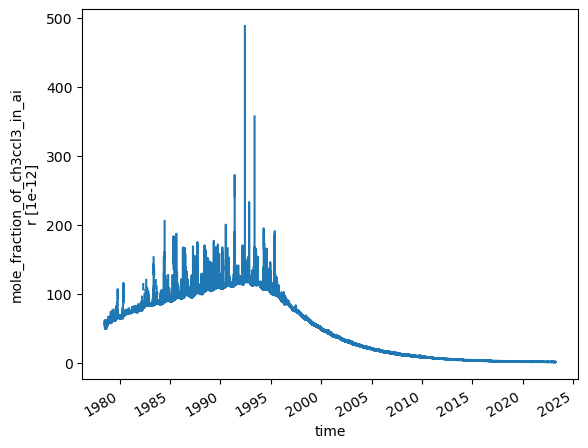

In [19]:
ds.mf.plot()

To output the file to the output directory, use the ```output_dataset``` function:

In [20]:
output_dataset(ds, network="AGAGE", instrument="combined")

Now try a species that's only measured on the Medusa:

In [21]:
ds = combine_datasets("NF3", "CGO", scale=None)

In [16]:
ds

<xarray.Dataset>
Dimensions:           (time: 65411)
Coordinates:
  * time              (time) datetime64[ns] 2004-01-21T00:38:00 ... 2023-04-1...
Data variables:
    inlet_height      (time) int32 10 10 10 10 10 10 10 ... 70 70 70 70 70 70 70
    mf                (time) float32 nan nan nan nan ... 2.883 2.899 2.887 2.899
    mf_repeatability  (time) float32 nan nan nan nan ... 0.01291 0.01286 0.01383
    instrument_type   (time) int64 4 4 4 4 4 4 4 4 4 4 4 ... 4 4 4 4 4 4 4 4 4 4
Attributes: (12/22)
    comment:                    AGAGE GCMS-Medusa measurements. Output from G...
    data_owner_email:           paul.krummel@csiro.au
    data_owner:                 Paul Krummel
    network:                    
    species:                    nf3
    site_code:                  CGO
    ...                         ...
    instrument_date:            2012-08-01 00:00:00
    instrument_comment:         upgraded MSD detector with generally improved...
    instrument_1:               agilent_5973
    instrument_date_1:          2004-01-01 00:00:00
    instrument_comment_1:       original MSD detector
    doi:

In [22]:
output_dataset(ds, network="AGAGE", instrument="GCMS-Medusa")